In [1]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as f
import torch.optim as optim
import random
import matplotlib.pyplot as plt

In [2]:
features_num = 2
examples_num = 500
true_w = [-2, 3]
true_b = 2

features_data = torch.randn(examples_num, features_num, dtype = torch.float32)
lables = true_w[0] * features_data[:, 0] + true_w[1] * features_data[:, 1] + true_b
lables += torch.tensor(np.random.normal(0, 0.01, size = lables.size()), dtype = torch.float32)

In [5]:
lables

tensor([ 4.7969,  4.7533, -1.4009,  5.6606,  0.5980, -3.8945,  2.2537,  5.9878,
         6.0781,  8.6045, -3.1374,  9.1103,  3.6442, -0.1866,  4.7580,  4.4866,
         3.0109,  2.2165,  0.7750,  0.8517,  0.2975,  1.2645,  3.5091,  2.1496,
         8.6825,  4.0323, -3.0206,  4.9446,  2.8411, 10.6841, -1.2538,  4.9277,
        -1.7965, -0.1555,  3.3217, -1.1097, -0.4421,  1.2360, -2.8367,  5.9586,
         0.5917,  2.1194,  4.5659,  1.1647,  1.4896, -3.5533, -0.1315,  0.1986,
         0.8243,  0.5402, -1.2893,  4.2098,  1.2506,  2.0115,  3.2453, -0.6699,
         3.3153,  2.0010,  3.7762,  4.2559,  0.0900,  4.6130,  2.1823,  5.6813,
        -1.5414,  3.3543,  5.4229,  4.7654, -1.4235,  0.0386,  0.3626, -7.6214,
         8.0404, -4.4544,  3.9117,  1.4200, 11.2797, -1.8119,  2.7420,  7.1478,
         5.9581,  1.6343,  0.2898, -0.1072,  0.2413, -2.2891,  1.5181,  1.2633,
         4.6473, -2.5349,  2.5419, -2.3760,  2.9704, -2.5051,  0.5391, -0.0347,
         1.6341,  2.4561, -7.4742,  3.48

In [6]:
def date_iter(features, lables, batch_size):
    data_num = len(features)
    indices = list(range(data_num))
    random.shuffle(indices)
    for i in range(0, data_num, batch_size):
        j = torch.LongTensor(indices[i: min(i+batch_size, data_num)])
        yield features.index_select(0,j), lables.index_select(0,j)


In [7]:
class net(nn.Module):
    def __init__(self):
        super(net,self).__init__()
        self.l1 = nn.Linear(features_num, 1)
        
    def forward(self, x):
        out = self.l1(x)
        return out


In [8]:
test_net = net()
loss = nn.MSELoss()
loss_list = []
learning_rate = 0.045
step = 100
batch_size = 10
optimizer = optim.SGD(test_net.parameters(), lr = learning_rate)

In [9]:
for epoch in range(step):
    for x, y in date_iter(features_data, lables, batch_size):
        optimizer.zero_grad()
        output = test_net(x)
        cost = loss(output, y.view(-1, 1))
        cost.backward()
        optimizer.step()
    loss_list.append(cost.item())

In [10]:
print('true_w:', true_w)
print('train_w', test_net.l1.weight)
print('true_b:', true_b)
print('train_b', test_net.l1.bias)

train_output = test_net(features_data)

true_w: [-2, 3]
train_w Parameter containing:
tensor([[-2.0001,  3.0021]], requires_grad=True)
true_b: 2
train_b Parameter containing:
tensor([1.9997], requires_grad=True)


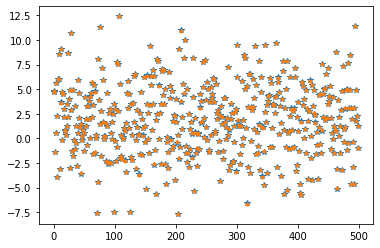

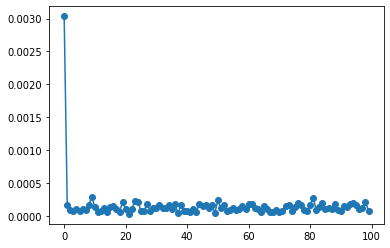

In [11]:
plt.figure(1)
plt.plot(range(0,examples_num),train_output.detach().numpy().tolist(),'*')
plt.plot(range(0,examples_num),lables.detach().numpy().tolist(),'.')
plt.show()
plt.figure(2)
plt.plot(range(0,step),loss_list,'o-')
plt.show()